<a href="https://colab.research.google.com/github/victoria2012/test_deeplearning/blob/master/mnist_fashion_classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from tensorflow.keras.datasets.fashion_mnist import load_data

In [2]:
(x_train, y_train), (x_test, y_test) = load_data()

4423680/4422102 [==============================] - 0s 0us/step


In [3]:
x_train.shape, y_train.shape, x_test.shape, y_test.shape

((60000, 28, 28), (60000,), (10000, 28, 28), (10000,))

In [4]:
import matplotlib.pyplot as plt
import numpy as np
np.random.seed(777)

In [5]:
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat', 'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

In [6]:
sample_size = 9

In [7]:
random_idx = np.random.randint(60000, size=sample_size)

In [8]:
plt.figure(figsize = (5, 5))

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

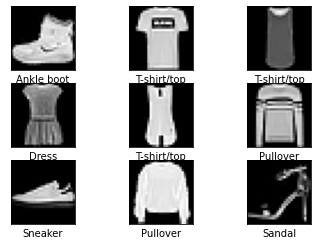

In [9]:
for i, idx in enumerate(random_idx):
  plt.subplot(3, 3, i+1)
  plt.xticks([])
  plt.yticks([])
  plt.imshow(x_train[i], cmap = 'gray')
  plt.xlabel(class_names[y_train[i]])
plt.show()

In [10]:
x_train = x_train / 255
type(x_train), x_train.shape, x_train[0]

(numpy.ndarray,
 (60000, 28, 28),
 array([[0.        , 0.        , 0.        , 0.        , 0.        ,
         0.        , 0.        , 0.        , 0.        , 0.        ,
         0.        , 0.        , 0.        , 0.        , 0.        ,
         0.        , 0.        , 0.        , 0.        , 0.        ,
         0.        , 0.        , 0.        , 0.        , 0.        ,
         0.        , 0.        , 0.        ],
        [0.        , 0.        , 0.        , 0.        , 0.        ,
         0.        , 0.        , 0.        , 0.        , 0.        ,
         0.        , 0.        , 0.        , 0.        , 0.        ,
         0.        , 0.        , 0.        , 0.        , 0.        ,
         0.        , 0.        , 0.        , 0.        , 0.        ,
         0.        , 0.        , 0.        ],
        [0.        , 0.        , 0.        , 0.        , 0.        ,
         0.        , 0.        , 0.        , 0.        , 0.        ,
         0.        , 0.        , 0.        , 0

In [11]:
x_test = x_test / 255
type(x_test), x_test.shape, x_test[0]

(numpy.ndarray,
 (10000, 28, 28),
 array([[0.        , 0.        , 0.        , 0.        , 0.        ,
         0.        , 0.        , 0.        , 0.        , 0.        ,
         0.        , 0.        , 0.        , 0.        , 0.        ,
         0.        , 0.        , 0.        , 0.        , 0.        ,
         0.        , 0.        , 0.        , 0.        , 0.        ,
         0.        , 0.        , 0.        ],
        [0.        , 0.        , 0.        , 0.        , 0.        ,
         0.        , 0.        , 0.        , 0.        , 0.        ,
         0.        , 0.        , 0.        , 0.        , 0.        ,
         0.        , 0.        , 0.        , 0.        , 0.        ,
         0.        , 0.        , 0.        , 0.        , 0.        ,
         0.        , 0.        , 0.        ],
        [0.        , 0.        , 0.        , 0.        , 0.        ,
         0.        , 0.        , 0.        , 0.        , 0.        ,
         0.        , 0.        , 0.        , 0

In [12]:
from tensorflow.keras.utils import to_categorical

In [13]:
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)
y_train[0]

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 1.], dtype=float32)

In [14]:
np.unique(y_test)         # unique 값이 2개지만 위에서 y_train[0]의 값을 보니 10개의 의견을 내야함을 알 수 있다. 그래서 output Dense에는 10을 넣어줘야 한다. 

array([0., 1.], dtype=float32)

In [15]:
from sklearn.model_selection import train_test_split

In [16]:
x_train, x_val, y_train, y_val = train_test_split(x_train, y_train, test_size=0.3, random_state = 777)

In [17]:
# import tensorflow as tf

In [18]:
# model = tf.keras.models.Sequential()

# model.add(tf.keras.layers.Flatten(input_shape = (28, 28)))  # input layer

# model.add(tf.keras.layers.Dense(64, activation='relu'))  # hidden layer
# model.add(tf.keras.layers.Dense(32, activation='relu'))  # hidden layer
# model.add(tf.keras.layers.Dense(10, activation='softmax'))  # output layer

# model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['acc'])

In [ ]:
# hist = model.fit(x_train, y_train, epochs = 30, batch_size=128, validation_data=(x_val,y_val))

In [20]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten

In [21]:
model = Sequential()

In [22]:
model.add(Flatten(input_shape = (28, 28)))
model.add(Dense(64, activation='relu'))
model.add(Dense(32, activation='relu'))
model.add(Dense(10, activation='softmax'))

In [23]:
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['acc'])

In [26]:
hist = model.fit(x_train, y_train, epochs=30, batch_size=128, validation_data=(x_val, y_val))

Epoch 1/30
329/329 [==============================] - 1s 4ms/step - loss: 0.1845 - acc: 0.9305 - val_loss: 0.3525 - val_acc: 0.8875
Epoch 2/30
329/329 [==============================] - 1s 4ms/step - loss: 0.1845 - acc: 0.9307 - val_loss: 0.3519 - val_acc: 0.8862
Epoch 3/30
329/329 [==============================] - 1s 4ms/step - loss: 0.1799 - acc: 0.9331 - val_loss: 0.3490 - val_acc: 0.8875
Epoch 4/30
329/329 [==============================] - 1s 4ms/step - loss: 0.1762 - acc: 0.9341 - val_loss: 0.3469 - val_acc: 0.8868
Epoch 5/30
329/329 [==============================] - 1s 4ms/step - loss: 0.1715 - acc: 0.9360 - val_loss: 0.3542 - val_acc: 0.8885
Epoch 6/30
329/329 [==============================] - 1s 4ms/step - loss: 0.1734 - acc: 0.9354 - val_loss: 0.3503 - val_acc: 0.8909
Epoch 7/30
329/329 [==============================] - 1s 4ms/step - loss: 0.1664 - acc: 0.9389 - val_loss: 0.3463 - val_acc: 0.8935
Epoch 8/30
329/329 [==============================] - 1s 4ms/step - loss: 0.

In [27]:
hist.history.keys()

dict_keys(['loss', 'acc', 'val_loss', 'val_acc'])

In [28]:
import matplotlib.pyplot as plt

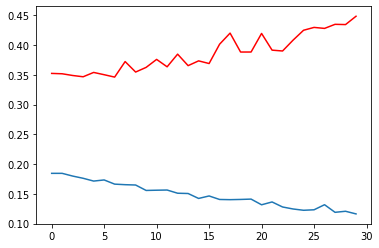

In [33]:
plt.plot(hist.history['loss'])
plt.plot(hist.history['val_loss'], 'r-')
plt.show()

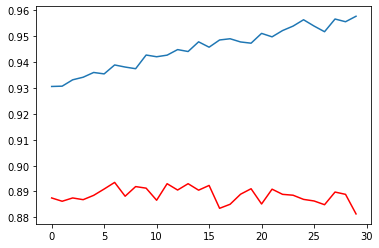

In [32]:
plt.plot(hist.history['acc'])
plt.plot(hist.history['val_acc'], 'r-')
plt.show()

In [38]:
y_test[100]

array([0., 0., 0., 1., 0., 0., 0., 0., 0., 0.], dtype=float32)

In [36]:
pred = model.predict(x_test[100:101])
pred

array([[1.4115265e-02, 3.3568520e-07, 2.1119817e-05, 9.8140395e-01,
        2.8480542e-07, 9.2816475e-09, 4.4587553e-03, 3.2829769e-07,
        1.9317576e-09, 1.7227029e-08]], dtype=float32)

In [37]:
np.argmax(pred, axis=1)

array([3])